In [920]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import shap

In [921]:
df = pd.read_csv('/Users/nglongvu1002/Documents/Documents/Swinburne - Master of Data Science/Technology Application Project/DataScience2/Client_Data.csv')


In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [923]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [924]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# <span style="color:00FFFF"> Preprocessing</span>


In [925]:
df.fillna(0, inplace=True)


In [926]:
#Handle missing values
df.fillna(0, inplace=True)

# Handle outliers
for column in df.select_dtypes(include=[np.number]).columns: 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, df[column], df[column])
    df[column] = np.where(df[column] > upper_bound, df[column], df[column])
    

In [927]:
df.drop('ID', axis=1, inplace=True)


# <span style="color:00FFFF"> Feature Engineering</span>


In [928]:
#Average delay in payment
payment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['avg_payment_delay'] = df[payment_columns].mean(axis=1)

In [929]:
#2 Total number of default
df['total_default'] = df[payment_columns].apply(lambda row: sum(row>0), axis=1)

In [930]:
#3 Payment trends over time
payment_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['payment_trend'] = df[payment_amt_columns].diff(axis=1).mean(axis =1)

In [931]:
#Ratio of bill amounts to payment amount
bill_columns = ['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['avg_bill_to_payment_ratio'] = df[bill_columns].sum(axis=1) / (df[payment_amt_columns].sum(axis=1) + 1e-6)

In [932]:
#age group categorization
df['age_group'] = pd.cut(df['AGE'], bins=[0, 25, 35, 50, 65, 100], labels=['<25', '25-35', '35-50', '50-65', '>65'])


In [933]:
#Payment Delay Severity
df['payment_delay_severity'] = df['avg_payment_delay'] * df['total_default']
#Default Rate
df['default_rate'] = df['total_default'] / 12 # Assuming 12 billing cycles in a year
#Recent Defaults
df['recent_defaults'] = df['PAY_0'].apply(lambda x: 1 if x > 0 else 0) # Approximation based on PAY_0
#Payment Trend Indicator
df['payment_trend_indicator'] = df['PAY_0'] - df['PAY_2']
# Days Since Last Payment (simplified)
df['days_since_last_payment'] = df['PAY_0'].apply(lambda x: x * 30 if x > 0 else -x * 30)
# Delay-to-Default Ratio
df['delay_to_default_ratio'] = df['avg_payment_delay'] / (df['total_default'] + 1e-9)

# <span style="color:00FFFF">Explorationaty Data Analysis</span>

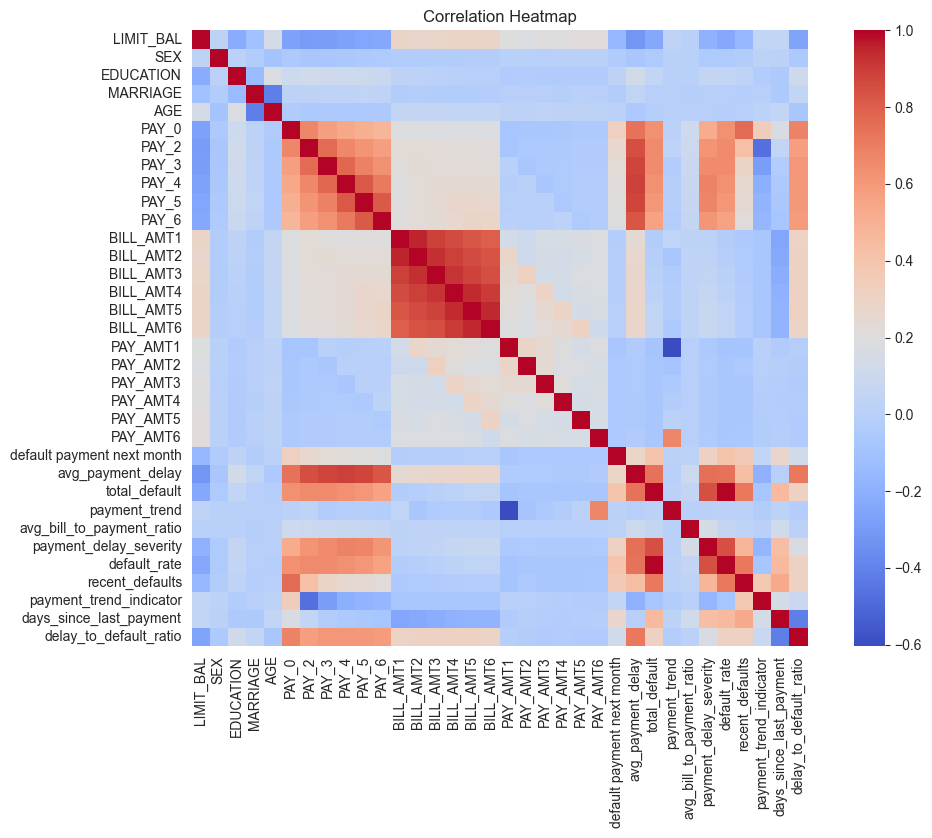

In [934]:
# Removing non-numeric columns from the dataset before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Replotting the Correlation Heatmap with numeric-only data
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

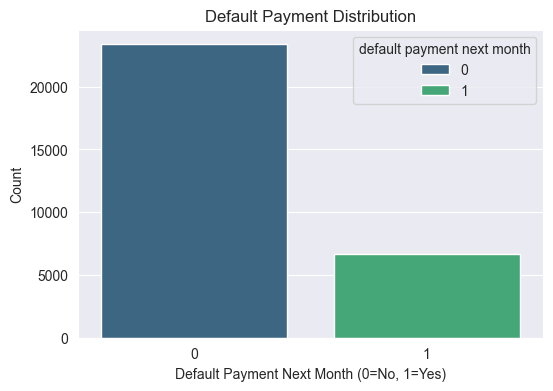

In [935]:
# Distribution of 'default payment next month'
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=df, palette="viridis", hue = 'default payment next month')
plt.title("Default Payment Distribution")
plt.xlabel("Default Payment Next Month (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()



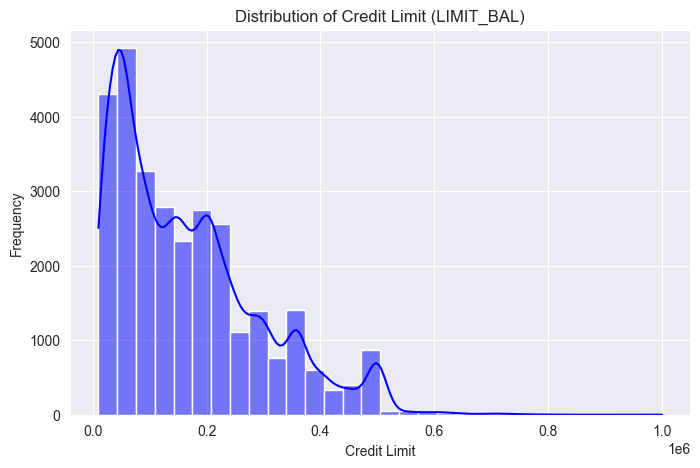

In [936]:
# Distribution of LIMIT_BAL
plt.figure(figsize=(8, 5))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color='blue')
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()


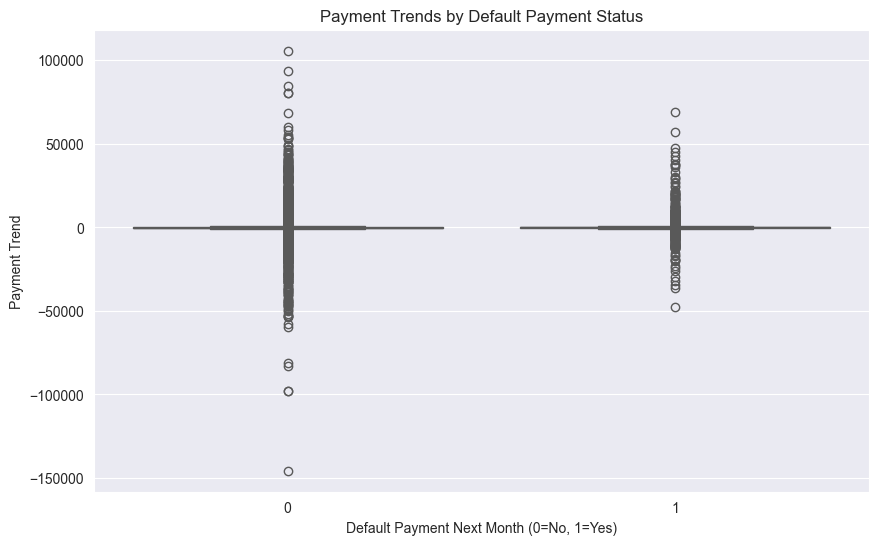

In [937]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='payment_trend', hue='default payment next month', data=df, palette="Set2", dodge=False)
plt.title("Payment Trends by Default Payment Status")
plt.xlabel("Default Payment Next Month (0=No, 1=Yes)")
plt.ylabel("Payment Trend")
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.show()


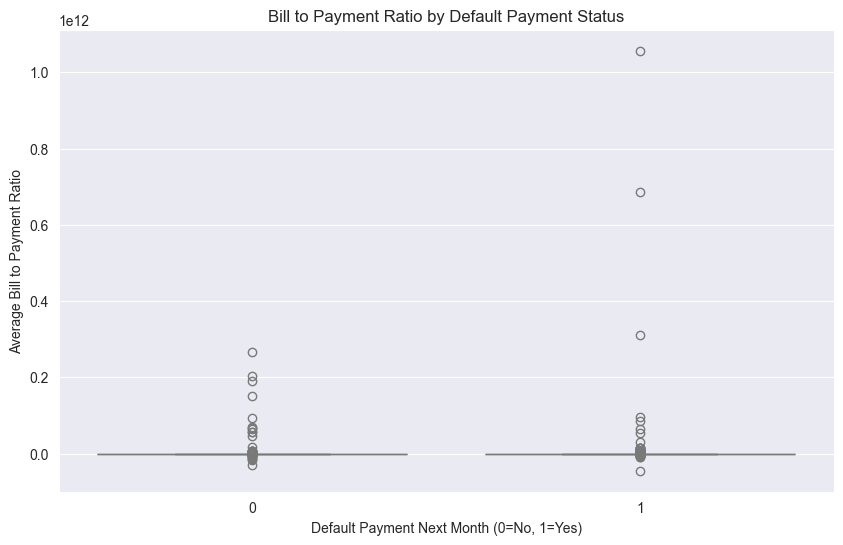

In [938]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='avg_bill_to_payment_ratio', hue='default payment next month', data=df, palette="coolwarm", dodge=False)
plt.title("Bill to Payment Ratio by Default Payment Status")
plt.xlabel("Default Payment Next Month (0=No, 1=Yes)")
plt.ylabel("Average Bill to Payment Ratio")
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.show()


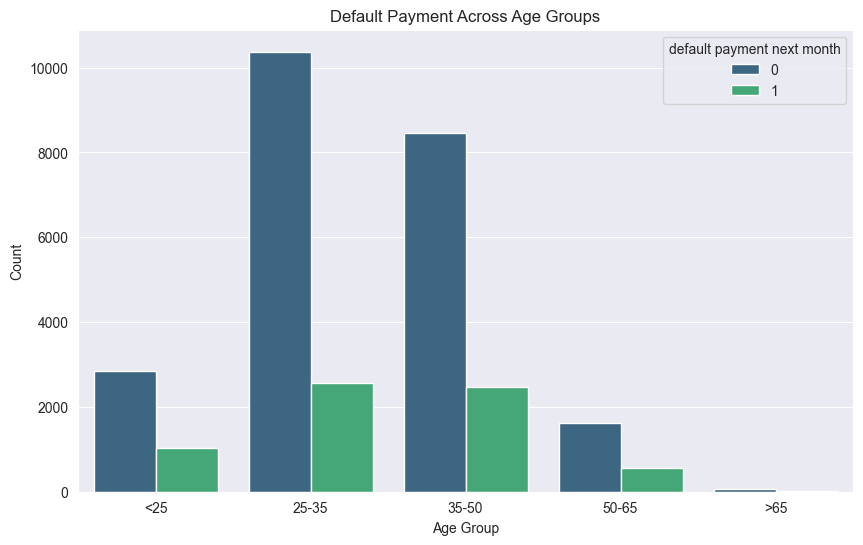

In [939]:
# Relationship between Age Group and Default Payment
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='default payment next month', data=df, palette="viridis")
plt.title("Default Payment Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

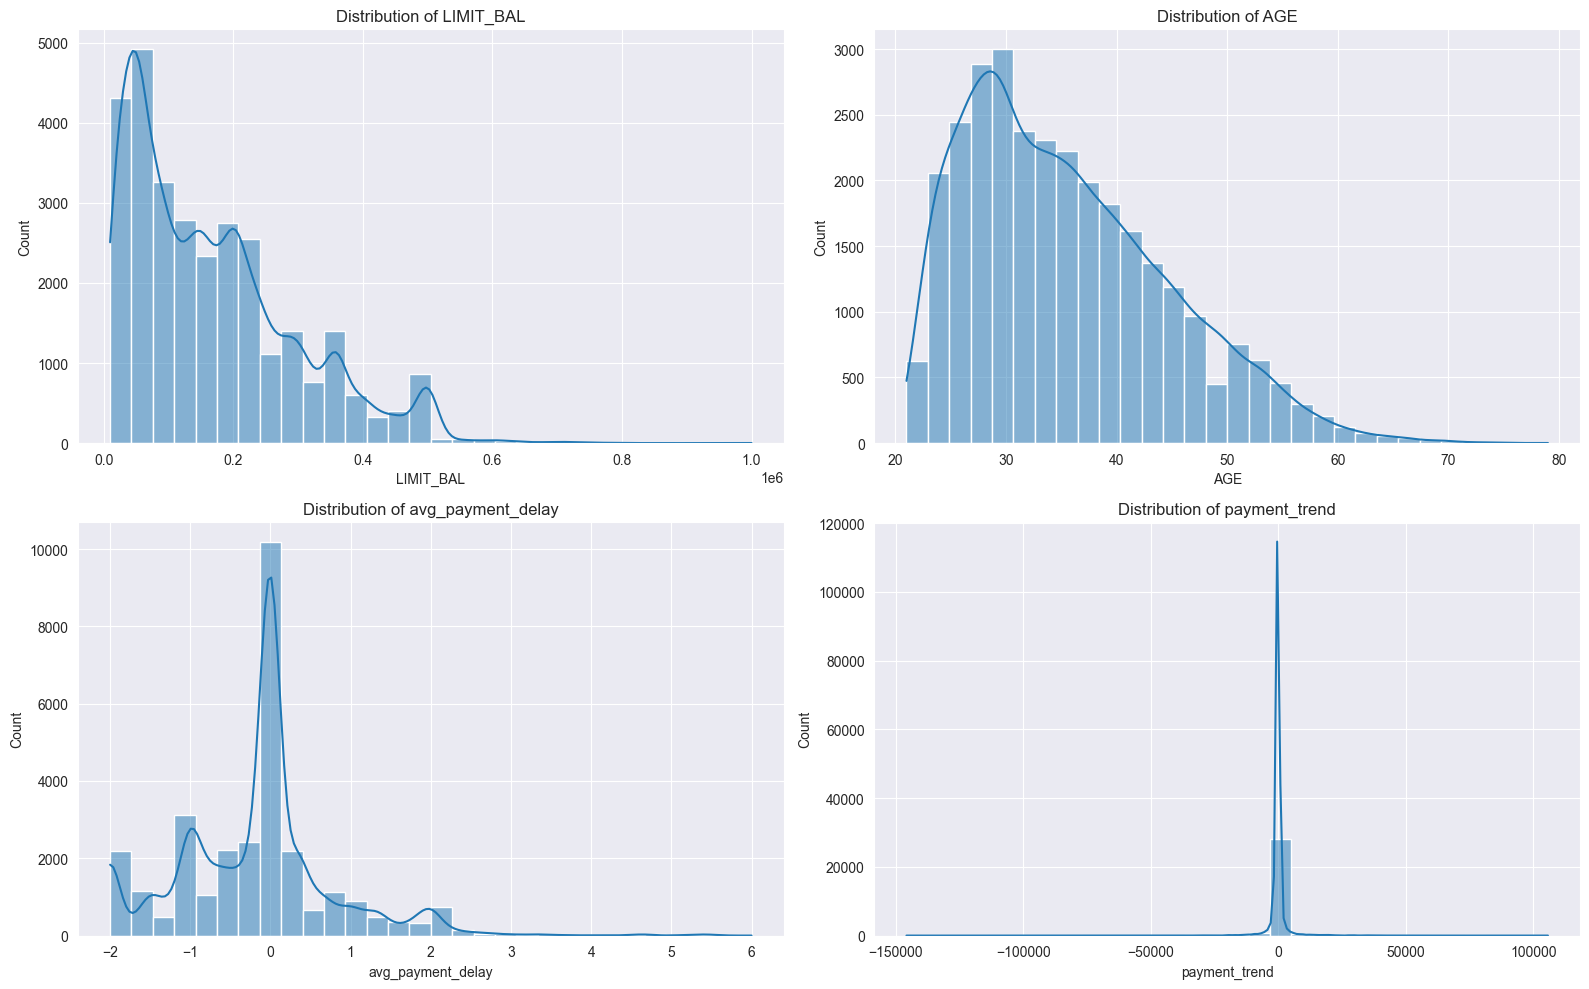

In [940]:
# Distribution of key features
features_to_plot = ['LIMIT_BAL', 'AGE', 'avg_payment_delay', 'payment_trend']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


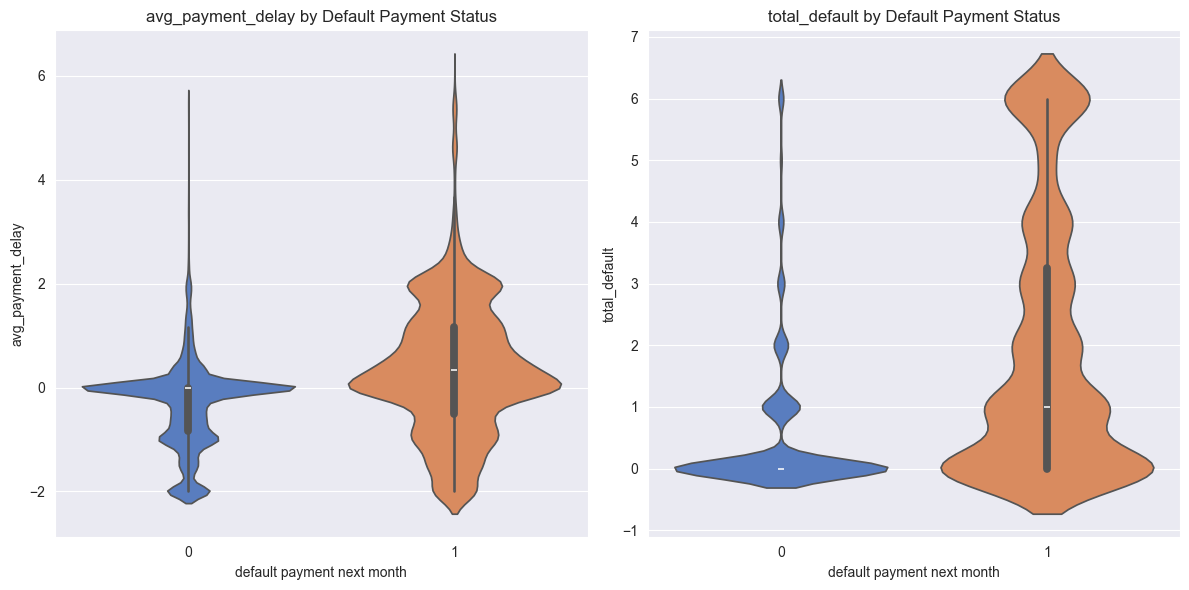

In [941]:
features_to_analyze = ['avg_payment_delay', 'total_default']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(1, 2, i+1)
    sns.violinplot(x='default payment next month', y=feature, hue='default payment next month', data=df, palette="muted", dodge=False)
    plt.title(f"{feature} by Default Payment Status")
    plt.legend([], [], frameon=False)  # Remove redundant legend
plt.tight_layout()
plt.show()

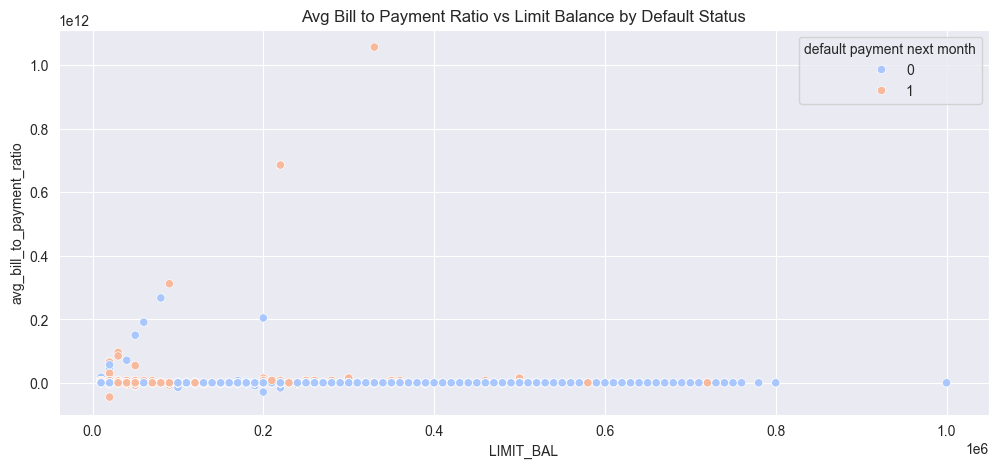

In [942]:
# Billing to payment ratio analysis
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x='LIMIT_BAL', y='avg_bill_to_payment_ratio', hue='default payment next month', data=df, palette="coolwarm"
)
plt.title("Avg Bill to Payment Ratio vs Limit Balance by Default Status")
plt.show()

In [943]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [944]:
# Define the mapping for ordinal encoding
age_group_mapping = {
    '<25': 1,
    '25-35': 2,
    '35-50': 3,
    '50-65': 4,
    '65+': 5
}

# Map the age_group column
df['age_group'] = df['age_group'].map(age_group_mapping)

# Verify the changes
print(df['age_group'].head())


0    1.0
1    2.0
2    2.0
3    3.0
4    4.0
Name: age_group, dtype: float64


In [945]:
# Check for missing values
print(df.isnull().sum())

# Display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values (%):\n", missing_percentage)


LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
avg_payment_delay              0
total_default                  0
payment_trend                  0
avg_bill_to_payment_ratio      0
age_group                     86
payment_delay_severity         0
default_ra

In [946]:
# Impute missing values in age_group with the most frequent category (mode)
df['age_group'] = df['age_group'].fillna(df['age_group'].mode()[0])

# Verify no missing values remain
print(df['age_group'].isnull().sum())


0


# <span style="color:#00FFFF">Model Development</span>

## <span style="color:#89CFF0">Train different machine learning models</span>


In [947]:
# Define features (X) and target (y)
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [948]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the training data
y_pred_train = xgb_model.predict(X_train)

# Classification report
print("Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))

# Confusion matrix
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))


Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     18691
           1       0.89      0.58      0.70      5309

    accuracy                           0.89     24000
   macro avg       0.89      0.78      0.82     24000
weighted avg       0.89      0.89      0.88     24000

Confusion Matrix (Training Data):
 [[18292   399]
 [ 2227  3082]]


In [949]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on the training data
y_pred_train_logistic = logistic_model.predict(X_train)

# Classification report
print("Classification Report (Training Data - Logistic Regression):\n", classification_report(y_train, y_pred_train_logistic))

# Confusion matrix
print("Confusion Matrix (Training Data - Logistic Regression):\n", confusion_matrix(y_train, y_pred_train_logistic))

Classification Report (Training Data - Logistic Regression):
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     18691
           1       0.31      0.00      0.00      5309

    accuracy                           0.78     24000
   macro avg       0.54      0.50      0.44     24000
weighted avg       0.67      0.78      0.68     24000

Confusion Matrix (Training Data - Logistic Regression):
 [[18682     9]
 [ 5305     4]]


In [950]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Predict on the training data
y_pred_train_rf = random_forest_model.predict(X_train)

# Classification report
print("Classification Report (Training Data - Random Forest):\n", classification_report(y_train, y_pred_train_rf))

# Confusion matrix
print("Confusion Matrix (Training Data - Random Forest):\n", confusion_matrix(y_train, y_pred_train_rf))


Classification Report (Training Data - Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion Matrix (Training Data - Random Forest):
 [[18685     6]
 [    7  5302]]


In [951]:
# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the LightGBM model
lgbm_model.fit(X_train, y_train)

# Predict on the training data
y_pred_train_lgbm = lgbm_model.predict(X_train)

# Classification report
print("Classification Report (Training Data - LightGBM):\n", classification_report(y_train, y_pred_train_lgbm))

# Confusion matrix
print("Confusion Matrix (Training Data - LightGBM):\n", confusion_matrix(y_train, y_pred_train_lgbm))

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4006
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
Classification Report (Training Data - LightGBM):
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     18691
           1       0.77      0.43      0.55      5309

    accuracy                           0.85     24000
   macro avg       0.81      0.70      0.73     24000
weighted avg       0.84      0.85      0.83     24000

Confusion Matrix (Training Data - LightGBM):
 [[18008   683]
 [ 3

## <span style="color:#89CFF0">Handle class imbalance: SMOTE</span>


In [952]:
# Define features (X) and target (y)
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)  # Scale the SMOTE-balanced training set
X_test = scaler.transform(X_test)  # Scale the test set

# Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
 default payment next month
0    16355
1    16355
Name: count, dtype: int64


In [953]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE-balanced training data
y_pred_train = xgb_model.predict(X_train_smote)

# Classification report
print("Classification Report (Training Data):\n", classification_report(y_train_smote, y_pred_train))

# Confusion matrix
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train_smote, y_pred_train))


Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     16355
           1       0.95      0.88      0.91     16355

    accuracy                           0.92     32710
   macro avg       0.92      0.92      0.92     32710
weighted avg       0.92      0.92      0.92     32710

Confusion Matrix (Training Data):
 [[15658   697]
 [ 2043 14312]]


<Figure size 1000x600 with 0 Axes>

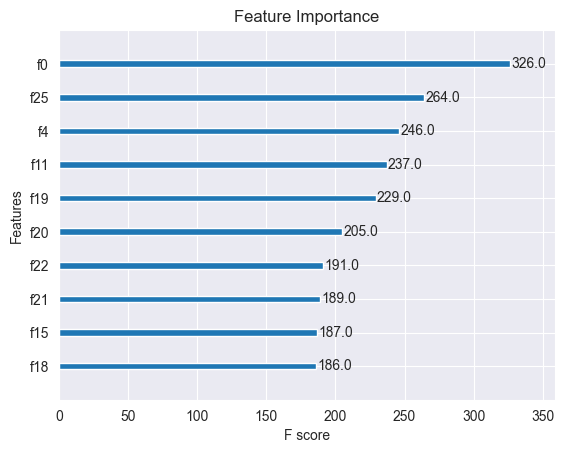

In [954]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# <span style="color:#00FFFF">SHAP Value Integration & Interpretation</span>


Max difference between model predictions and SHAP values: 11.745970726013184


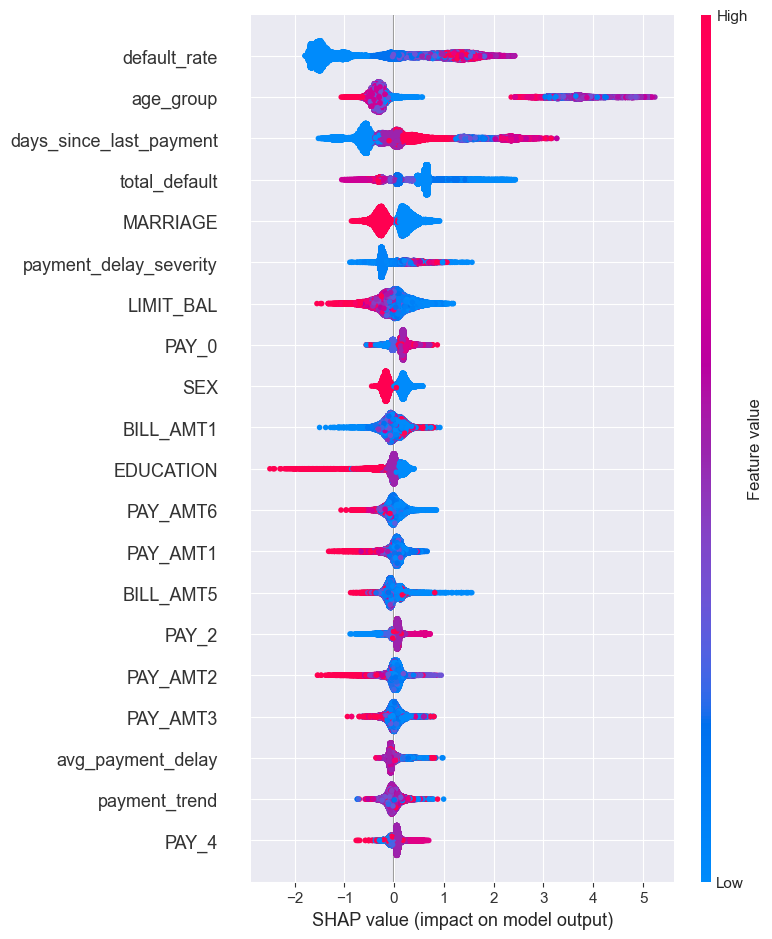

In [955]:
# Save feature names from the original DataFrame (before converting to NumPy)
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()  # Extract feature names as a list
else:
    feature_names = None  # Handle case where feature names are not available

# Ensure data shape matches the model's expectations
assert X_train_smote.shape[1] == xgb_model.n_features_in_, "Mismatch in feature count between data and model!"

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_smote)

# Validate SHAP values vs predictions (optional debug step)
predictions = xgb_model.predict(X_train_smote)
shap_predictions = shap_values.sum(axis=1) + explainer.expected_value
max_difference = np.max(np.abs(predictions - shap_predictions))
print(f"Max difference between model predictions and SHAP values: {max_difference}")

# Generate SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_train_smote, feature_names=feature_names)



In [956]:
# Calculate mean absolute SHAP values
feature_importance = np.abs(shap_values).mean(axis=0)  # Remove `.values`

# Create a DataFrame to rank features by importance
feature_ranking = pd.DataFrame({
    'feature': feature_names,  # Ensure 'feature_names' is defined earlier
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Display top features
print(feature_ranking.head())


                    feature  importance
29             default_rate    1.161280
27                age_group    1.078066
32  days_since_last_payment    0.669257
24            total_default    0.518585
3                  MARRIAGE    0.281555


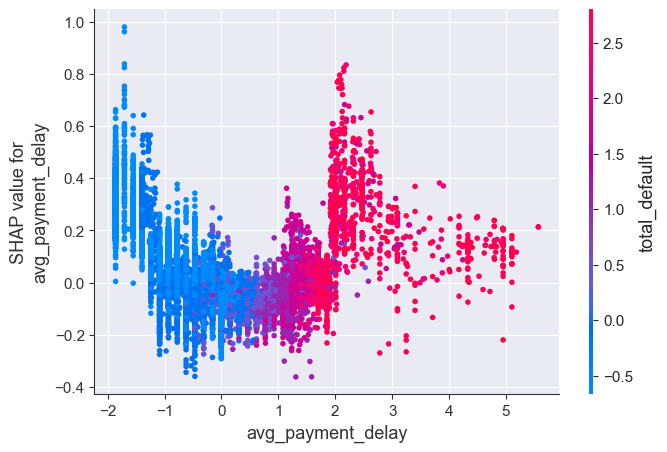

In [957]:
shap.dependence_plot('avg_payment_delay', shap_values, X_train_smote, feature_names=feature_names)


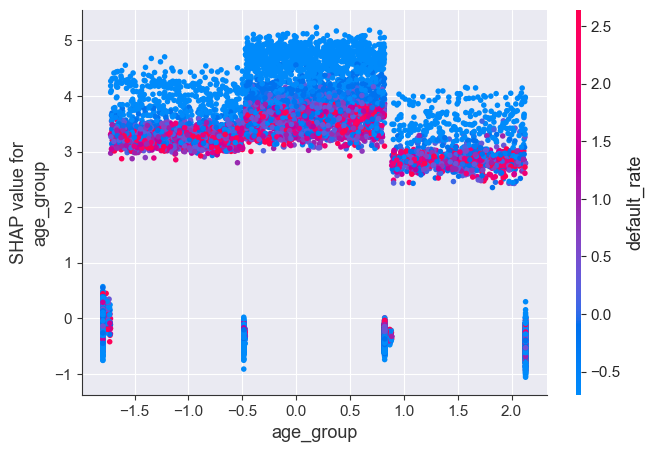

In [958]:
shap.dependence_plot('age_group', shap_values, X_train_smote, feature_names=feature_names)


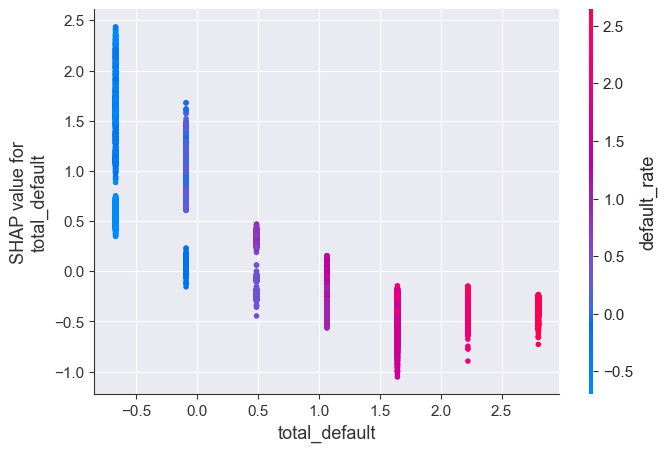

In [959]:
shap.dependence_plot('total_default', shap_values, X_train_smote, feature_names=feature_names)


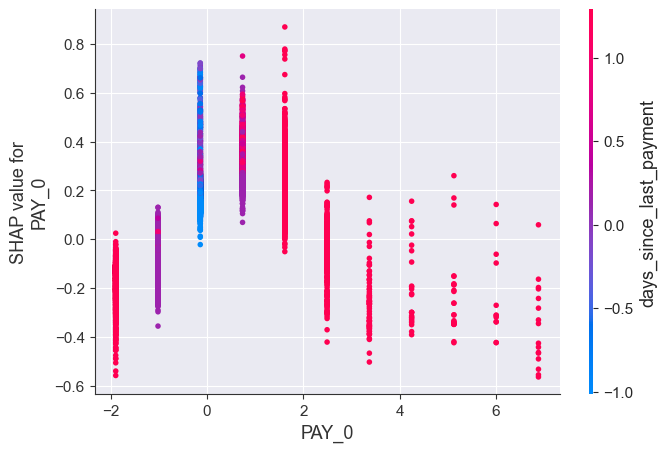

In [960]:
shap.dependence_plot('PAY_0', shap_values, X_train_smote, feature_names=feature_names)

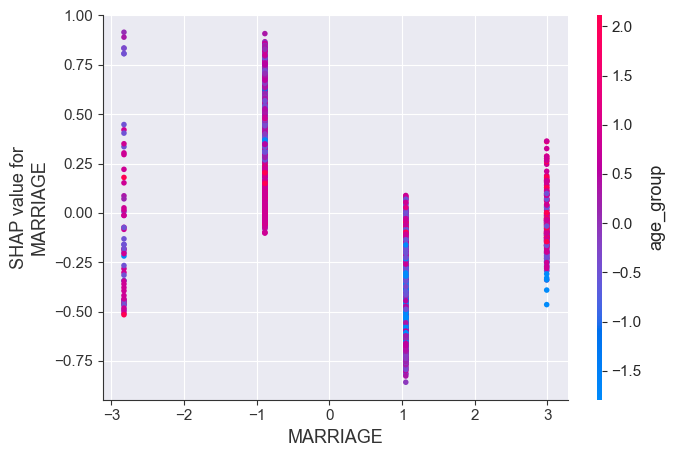

In [961]:
shap.dependence_plot('MARRIAGE', shap_values, X_train_smote, feature_names=feature_names)


In [962]:
# Initialize JavaScript visualization in the notebook
shap.initjs()

# Generate the force plot
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_smote[0, :], feature_names=feature_names)

In [963]:
# Extract the SHAP values for the first instance and its corresponding features
instance_shap_values = shap_values[0, :]
instance_features = X_train_smote[0, :]

# Create a DataFrame to organize feature contributions
shap_contributions = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': instance_shap_values,
    'Feature Value': instance_features
})

# Sort by the absolute SHAP value to find the strongest contributors
shap_contributions = shap_contributions.reindex(
    shap_contributions['SHAP Value'].abs().sort_values(ascending=False).index
)

# Display the top contributors
print("Strongest Features Contributing to the Prediction:")
print(shap_contributions.head(10))  # Top 10 strongest features

Strongest Features Contributing to the Prediction:
                    Feature  SHAP Value  Feature Value
29             default_rate   -1.658979      -0.701442
24            total_default    0.677169      -0.669232
32  days_since_last_payment   -0.532462      -1.017641
18                 PAY_AMT2   -0.332444       0.066884
27                age_group   -0.316846      -0.486173
17                 PAY_AMT1   -0.291529       0.086730
22                 PAY_AMT6   -0.290474       0.066697
28   payment_delay_severity   -0.268158      -0.420921
25            payment_trend   -0.223070      -0.010090
1                       SEX   -0.221709       0.986396


# <span style="color:#00FFFF">Model Training and Tuning</span>

Cross-Validated ROC-AUC Scores: [0.92939126 0.93566926 0.92793081 0.93140712 0.9262254 ]
Mean ROC-AUC Score: 0.9301
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.61      0.41      0.49      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.67      0.69      9000
weighted avg       0.79      0.81      0.80      9000

Confusion Matrix (Test Data):
 [[6483  526]
 [1180  811]]
ROC-AUC Score (Test Data): 0.7708


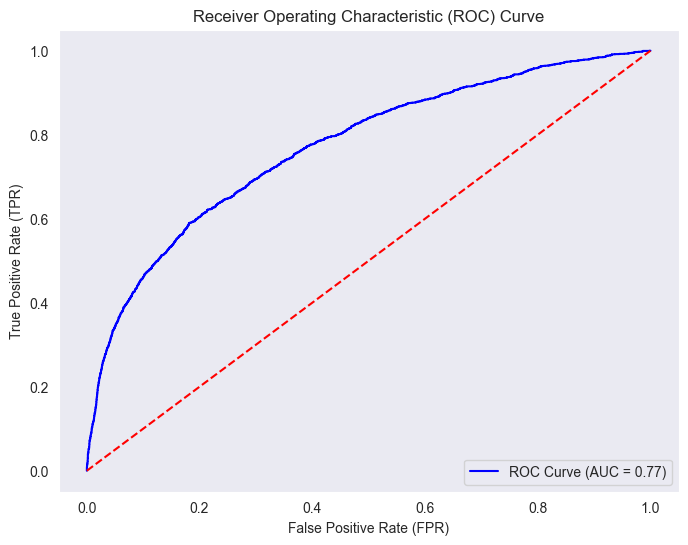

In [964]:
best_params = {
    'subsample': 0.8,
    'n_estimators': 500,
    'max_depth': 6,
    'learning_rate': 0.05,
    'gamma': 2,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'eval_metric': 'logloss',
}

#Initialize the Model
xgb_model = XGBClassifier(**best_params)

# Step 3: Apply Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Stratified CV
cv_scores = cross_val_score(
    fixed_xgb_model, X_train_smote, y_train_smote, cv=cv, scoring='roc_auc', n_jobs=-1
)

# Print Cross-Validation Results
print(f"Cross-Validated ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.4f}")

#Train the Model on Training Set
xgb_model.fit(X_train_smote, y_train_smote)

# Predict the Model on Test Set
y_pred_test = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the Model on Test Data
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

# Calculate and Display ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score (Test Data): {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [965]:
threshold = 0.4# Experiment with this value
y_pred_test_thresh = (y_pred_probs >= threshold).astype(int)

print("Classification Report (Custom Threshold):\n", classification_report(y_test, y_pred_test_thresh))
print("Confusion Matrix (Custom Threshold):\n", confusion_matrix(y_test, y_pred_test_thresh))


Classification Report (Custom Threshold):
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      7009
           1       0.53      0.50      0.52      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000

Confusion Matrix (Custom Threshold):
 [[6138  871]
 [ 997  994]]


In [966]:
xgb_model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<Figure size 1200x800 with 0 Axes>

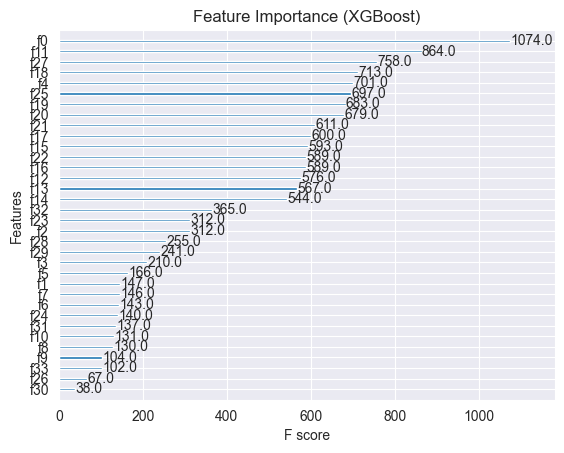

In [967]:
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=50) 
plt.title('Feature Importance (XGBoost)')
plt.show()

In [968]:
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for sorting
feature_importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Display the r weakest features
r = 8 # Change this value to remove the desired number of weakest features
weakest_features = feature_importance_df.head(r).index.tolist()
print(f"Weakest {r} Features: {weakest_features}")


Weakest 8 Features: ['f30', 'f26', 'f33', 'f9', 'f8', 'f10', 'f31', 'f24']


In [969]:
X_train_smote = pd.DataFrame(X_train_smote, columns=feature_importance_df.index)  # Ensure column alignment
X_test = pd.DataFrame(X_test, columns=feature_importance_df.index)  # Ensure column alignment

X_train_smote = X_train_smote.drop(columns=weakest_features)
X_test = X_test.drop(columns=weakest_features)

# Step 3: Retrain the Model
xgb_model.fit(X_train_smote, y_train_smote)

# Step 4: Evaluate the Updated Model
y_pred_test = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report (After Removing Weakest Features):\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix (After Removing Weakest Features):\n", confusion_matrix(y_test, y_pred_test))

roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score (After Removing Weakest Features): {roc_auc:.4f}")

Classification Report (After Removing Weakest Features):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.60      0.42      0.49      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.67      0.69      9000
weighted avg       0.79      0.81      0.80      9000

Confusion Matrix (After Removing Weakest Features):
 [[6453  556]
 [1164  827]]
ROC-AUC Score (After Removing Weakest Features): 0.7616


In [970]:
threshold = 0.4 # Experiment with this value
y_pred_test_thresh = (y_pred_probs >= threshold).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred_test_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_thresh))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      7009
           1       0.54      0.51      0.52      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.69      0.70      9000
weighted avg       0.79      0.79      0.79      9000

Confusion Matrix:
 [[6136  873]
 [ 981 1010]]
